In [3]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

In [4]:
train_dataset = image_dataset_from_directory(
        'dataset',
        labels = 'inferred',
        label_mode = 'int',
        class_names = ['Boot','Sandal','Shoe'],
        color_mode = 'grayscale',
        image_size = (136,102),
        shuffle = True,
        seed = 1,
        validation_split = 0.3,
        subset = 'training'
        )

val_dataset = image_dataset_from_directory(
        'dataset',
        labels = 'inferred',
        label_mode = 'int',
        class_names = ['Boot','Sandal','Shoe'],
        color_mode = 'grayscale',
        image_size = (136,102),
        shuffle = True,
        seed = 1,
        validation_split = 0.3,
        subset = 'validation'
        )

Found 15000 files belonging to 3 classes.
Using 10500 files for training.
Found 15000 files belonging to 3 classes.
Using 4500 files for validation.


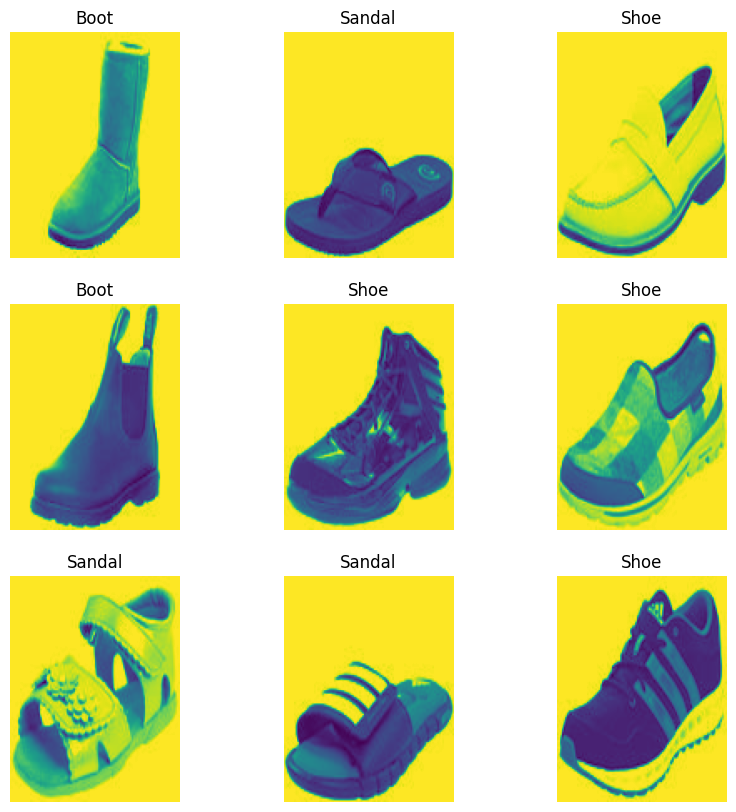

In [40]:
import matplotlib.pyplot as plt

class_name = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("float32"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [41]:
def augment(x,y):
    images = tf.image.random_flip_left_right(x,seed=None)
    images = tf.image.random_flip_up_down(x, seed=None)
    return images,y

def standard(x,y) :
    images = tf.image.per_image_standardization(x)
    return images,y

In [42]:
train = train_dataset.map(standard)
train = train.map(augment)

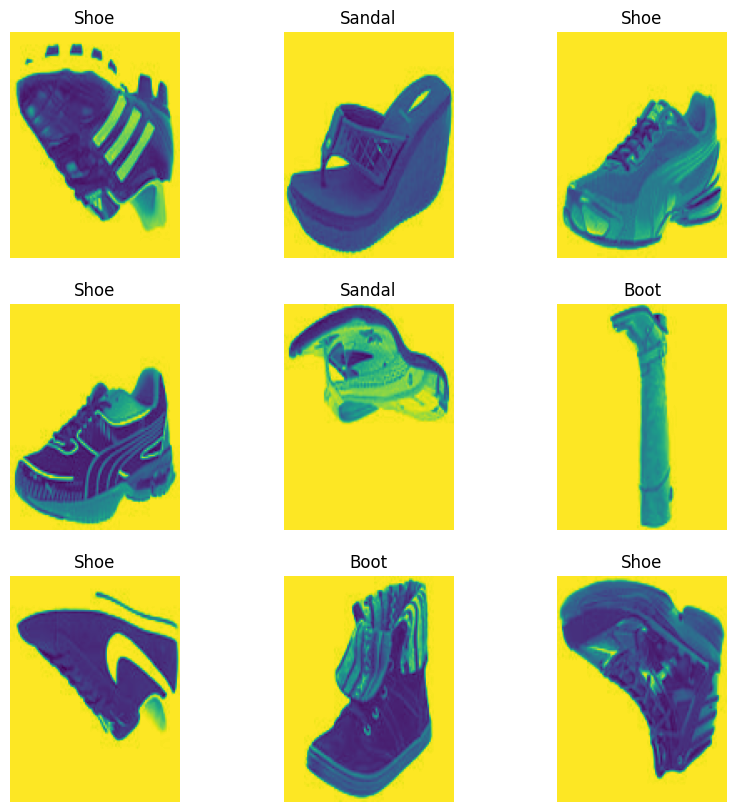

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("float32"))
    plt.title(class_name[labels[i]])
    plt.axis("off")